# Project Overview

In [ ]:
# Employee Promotion Prediction
# This notebook performs data analysis, visualization,
# model-wise training, evaluation, and final model selection.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set_style("whitegrid")

# Load Dataset

In [3]:
df = pd.read_csv(r'D:\Projects\Test_data.csv')

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


# Basic EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

# Handle Missing Values

In [7]:
# Fill missing education with 'Unknown'
df['education'] = df['education'].fillna('Unknown')

# Fill missing previous_year_rating with median
df['previous_year_rating'] = df['previous_year_rating'].fillna(
    df['previous_year_rating'].median()
)

In [8]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [12]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

# Data Visualization

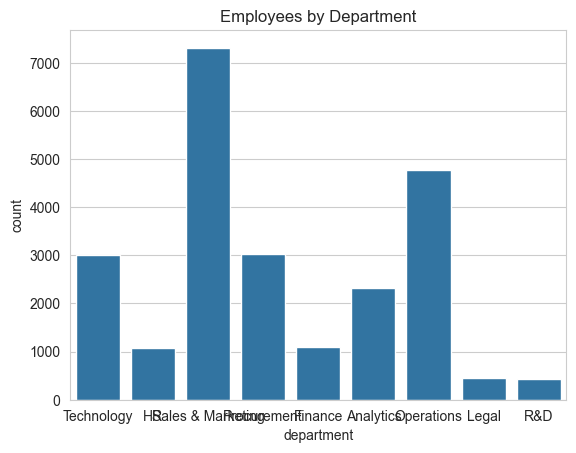

In [13]:
sns.countplot(x='department', data=df)
plt.title("Employees by Department")
plt.show()

# Clean Column names

In [16]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('?', '', regex=False)
    .str.replace('>', 'gt', regex=False)
)
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpis_met_gt80%', 'awards_won',
       'avg_training_score'],
      dtype='object')

# Encode Category Feature

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = [
    'department', 'region', 'education',
    'gender', 'recruitment_channel'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = [
    'no_of_trainings', 'age', 'previous_year_rating',
    'length_of_service', 'avg_training_score'
]

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Correction Analysis

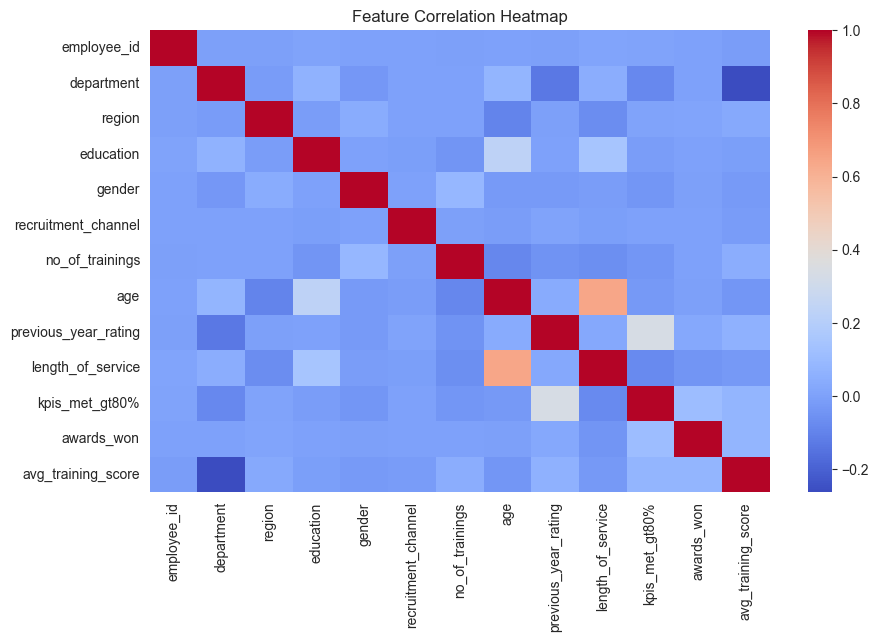

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Performance-Oriented Visual Analysis

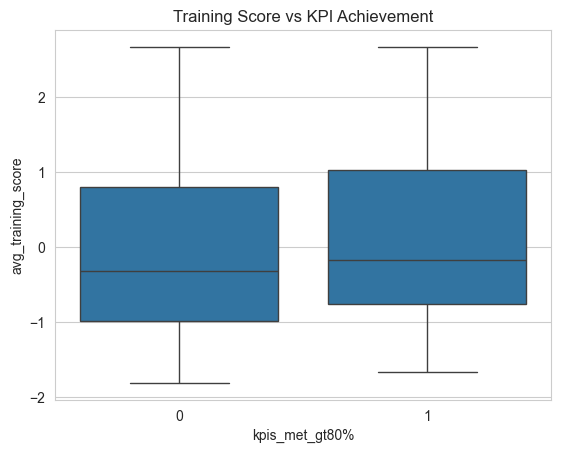

In [20]:
sns.boxplot(x='kpis_met_gt80%', y='avg_training_score', data=df)
plt.title("Training Score vs KPI Achievement")
plt.show()

# Award vs Experience

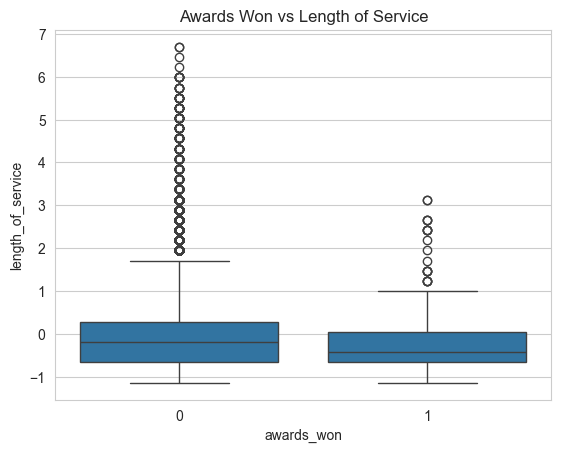

In [21]:
sns.boxplot(x='awards_won', y='length_of_service', data=df)
plt.title("Awards Won vs Length of Service")
plt.show()

# Select Feature for cluster

In [24]:
features_for_clustering = [
    'no_of_trainings', 'age', 'previous_year_rating',
    'length_of_service', 'kpis_met_gt80%', 'avg_training_score'
]

X_cluster = df[features_for_clustering]

# Standardize Features

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# K-means clustering

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['performance_cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize Clusters

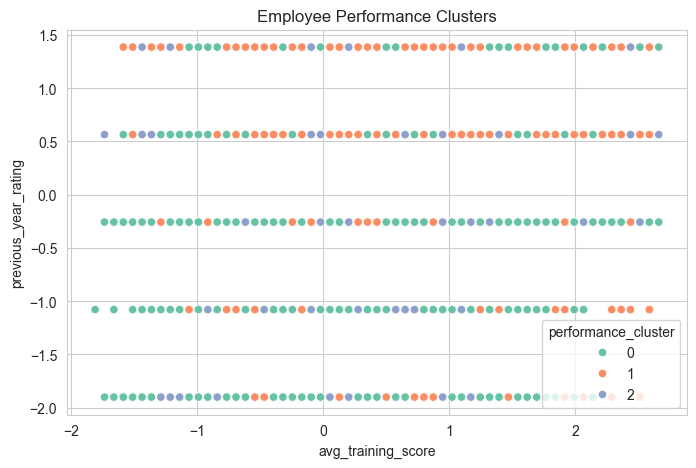

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='avg_training_score',
    y='previous_year_rating',
    hue='performance_cluster',
    data=df,
    palette='Set2'
)
plt.title("Employee Performance Clusters")
plt.show()

# Cluster distribution

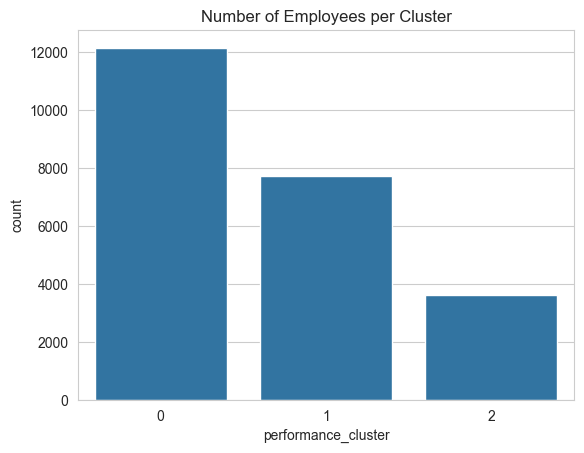

In [28]:
sns.countplot(x='performance_cluster', data=df)
plt.title("Number of Employees per Cluster")
plt.show()

# Cluster insights

In [29]:
df.groupby('performance_cluster')[features_for_clustering].mean()

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met_gt80%,avg_training_score
performance_cluster,,,,,,
0,0.077255,-0.352765,-0.279694,-0.298322,0.000082,-0.040615
1,-0.042057,-0.219966,0.433823,-0.278648,1.000000,0.104777
2,-0.170039,1.655023,0.015207,1.597128,0.197678,-0.086886


# Top features

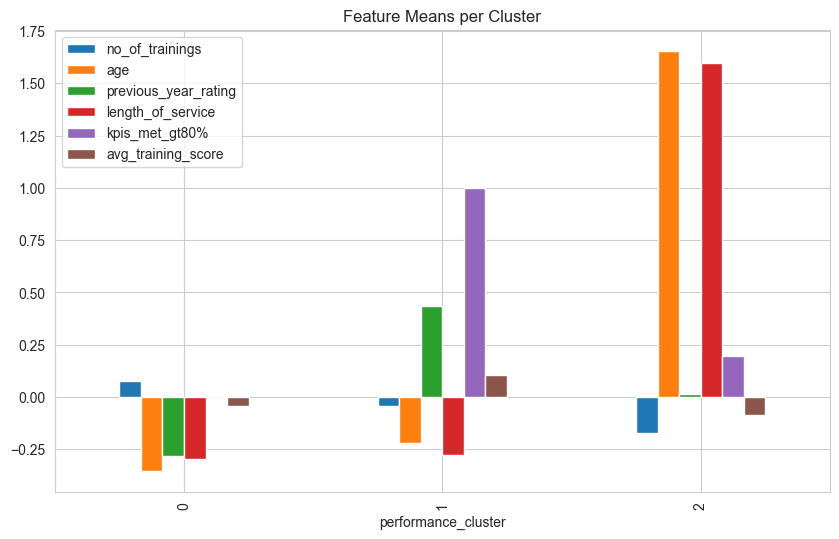

In [30]:
# Identify which features drive cluster differences
cluster_means = df.groupby('performance_cluster')[features_for_clustering].mean()
cluster_means.plot(kind='bar', figsize=(10,6))
plt.title("Feature Means per Cluster")
plt.show()

# Final Analytical Conclusion

### Since the dataset does not contain promotion labels,
### supervised ML models could not be applied.

### Instead, K-Means clustering was used to group employees
### based on performance-related features such as:
### - Avg Training Score
### - KPIs met >80%
### - Previous Year Rating
### - Length of Service

### Insights:
### - Employees naturally form 3 distinct performance clusters
### - Cluster analysis highlights high-potential employees
### - HR teams can use clusters to prioritize promotions and training

### This approach provides data-driven insights
### without needing explicit promotion labels.